In [10]:
import random
import itertools
import matplotlib.pyplot as plt
import numpy

In [11]:

def proba_medic(num_medicament):
    # Probabilités de réussite pour chaque médicament (10 types de médicaments avec 10 médicaments par type)
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament - 1] / 100):
        return False
    else:
        return True

In [12]:

def strategy_find2(results):
    # Trouver les médicaments avec un taux de réussite supérieur à 2
    best_medications = [i + 1 for i, rate in enumerate(results) if rate > 2]
    return best_medications

In [13]:
def strategy_find(results):
    # Trouver le médicament avec le taux de réussite le plus élevé
    max_success_rate = max(results)
    best_medication = results.index(max_success_rate) + 1
    return best_medication

- voir succes_rate clément
- finir fonction 1
- finir fonction beta
- courbe
- read me à fond
- se renseigner et lire

Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 1


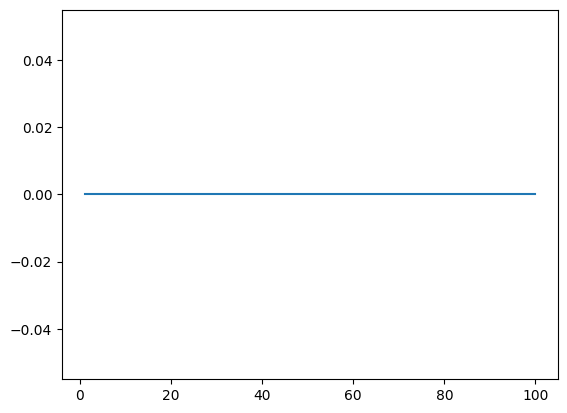

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Le médicament le plus efficace sur la période de 100 jours est : []


In [20]:

def medoc_strategy():
    # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès pour chaque médicament
    success_rates = [0] * 10
    x = []
    nb = 0
    nb_soigne = []
    taux_soigne = 0
    # Test sur la période de 100 jours
    for day in range(100):
        nb+=1
        x.append(nb)
        # Réinitialisation du nombre de médicaments disponibles pour chaque journée
        medications_available = [1] * 10 
        # Administration d'un médicament par jour
        medication = medoc[day % 10]
        
        # Vérification de l'administration du médicament
        if medications_available[medication - 1] > 0:
            medications_available[medication - 1] -= 1
            success = proba_medic(medication)
            if success:
                taux_soigne+=1
                success_rates[medication - 1] += 1
        # Ajout de la valeur du nombre de soigné
        nb_soigne.append(taux_soigne)
        
        if (day + 1) % 10 == 0:
            best_medication = strategy_find(success_rates)
            
            print("Le médicament le plus efficace à ce jour est :", best_medication)
    y = nb_soigne
    plt.plot(x, y)
    plt.show()
    print(success_rates)
    best_medication = strategy_find2(success_rates)
    print("Le médicament le plus efficace sur la période de 100 jours est :", best_medication)
medoc_strategy()

Les médicaments à donner sont : 3
Les médicaments à donner sont : 5
Les médicaments à donner sont : 5
Les médicaments à donner sont : 4
Les médicaments à donner sont : 7
Les médicaments à donner sont : 6
Les médicaments à donner sont : 2
Les médicaments à donner sont : 1
Les médicaments à donner sont : 10
Les médicaments à donner sont : 4
Les médicaments à donner sont : 4
Les médicaments à donner sont : 1
Les médicaments à donner sont : 9
Les médicaments à donner sont : 6
Les médicaments à donner sont : 6
Les médicaments à donner sont : 3
Les médicaments à donner sont : 8
Les médicaments à donner sont : 4
Les médicaments à donner sont : 4
Les médicaments à donner sont : 4
Les médicaments à donner sont : 2
Les médicaments à donner sont : 7
Les médicaments à donner sont : 3
Les médicaments à donner sont : 5
Les médicaments à donner sont : 4
Les médicaments à donner sont : 4
Les médicaments à donner sont : 1
Les médicaments à donner sont : 7
Les médicaments à donner sont : 9
Les médicamen

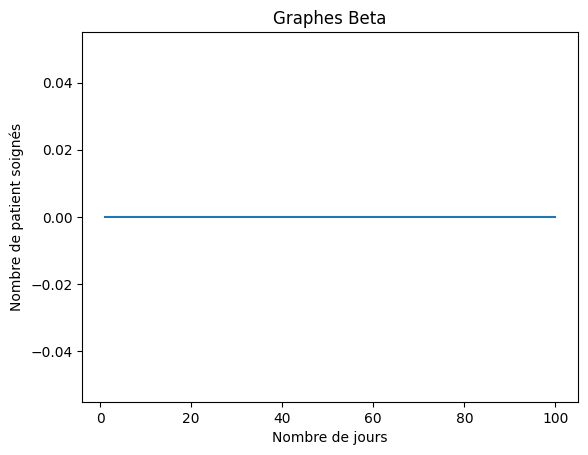

Lse médicaments les plus efficaces sont : []


In [15]:

def medoc_strategy2(): # fonction qui utilise la loi Beta
   # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès pour chaque médicament
    success_rates = [0] * 10
    success_fail = [0] * 10
    a=1
    b=1
    x = []
    nb = 0
    nb_soigne = []
    taux_soigne = 0
    # Création de l'itérable cyclique pour les médicaments
    for day in range(100):
        valeur = []
        nb+=1
        x.append(nb)
        # Administration d'un médicament par jour
        for i in medoc:
            valeur.append(numpy.random.beta(a, b))
            medication_choose = max(valeur)
            for i in range(len(valeur)):
                if medication_choose==valeur[i]:
                    medication = i
        # Vérification de l'administration du médicament
        success = proba_medic(medication)
        if success:
            taux_soigne+=1
            success_rates[medication]+=1
        else:
            success_fail[medication]+=1
        #ajout de la valeur du nombre de soigné
        nb_soigne.append(taux_soigne)
        a = 1+success_rates[medication]
        b = 1+success_fail[medication]
       
        medicament = medoc[medication]
        print("Les médicaments à donner sont :", medicament)
    y = nb_soigne
    plt.plot(x, y)
    plt.ylabel("Nombre de patient soignés")
    plt.xlabel("Nombre de jours")
    plt.title("Graphes Beta")
    plt.show()

    best_medication = strategy_find1(success_rates)
    print("Lse médicaments les plus efficaces sont :", best_medication)
medoc_strategy2()


Jour 30
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04623655913978494, 0.0, 0.012903225806451613]
Jour 60
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.0, 0.0, 0.010655737704918029, 0.0, 0.011748633879781418, 0.0, 0.003278688524590164]
Jour 90
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.008058608058608061, 0.0, 0.004761904761904761, 0.0, 0.005250305250305248, 0.0, 0.0014652014652014659]


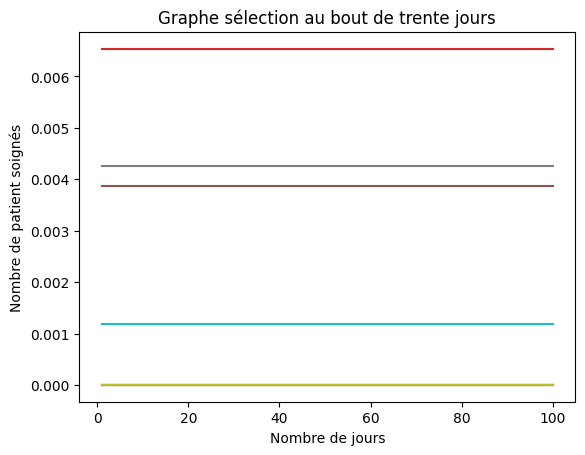

Le meilleur médicament à tester est le médicament 4
Jour 30
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.018279569892473122, 0.0, 0.0, 0.0]
Jour 60
Pourcentages de réussite : [0.009562841530054642, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004644808743169399, 0.0, 0.0, 0.0]
Jour 90
Pourcentages de réussite : [0.004273504273504273, 0.007936507936507938, 0.0, 0.0, 0.0, 0.010866910866910868, 0.002075702075702077, 0.0, 0.0, 0.009035409035409036]


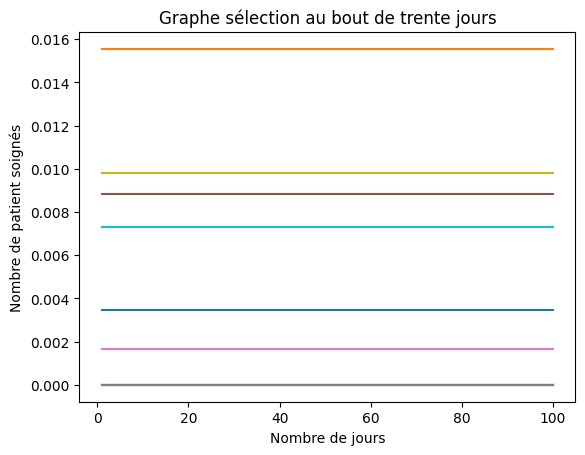

[0.0034653465346534645,
 0.015544554455445543,
 0.0,
 0.0,
 0.0,
 0.008811881188118815,
 0.0016831683168316847,
 0.0,
 0.009801980198019802,
 0.00732673267326733]

In [16]:
import random

def exploration():
    # Initialisation des pourcentages de réussite à 0
    p = [0.0] * 10
    nb_soigne=[]
    nb=0
    x=[]
    for day in range(100):
        nb+=1
        x.append(nb)
        # Test de chaque médicament sur le patient
        for num_medicament in range(1, 11):
            result = proba_medic(num_medicament)
            
            # Mise à jour du pourcentage de réussite
            if result:
                p[num_medicament-1] = (p[num_medicament-1] * day + 1) / (day + 2)
            else:
                p[num_medicament-1] = (p[num_medicament-1] * day) / (day + 2)
                # Ajout de la valeur du nombre de soigné
        nb_soigne.append(p)
        if day % 30 == 29:
            print("Jour", day+1)
            print("Pourcentages de réussite :", p)
            
    y = nb_soigne
    plt.plot(x, y)
    plt.ylabel("Nombre de patient soignés")
    plt.xlabel("Nombre de jours")
    plt.title("Graphe sélection au bout de trente jours")
    plt.show()
    return p

def meilleur_medicament(p):
    # Recherche du médicament avec le plus haut pourcentage de réussite
    max_proba = max(p)
    index = p.index(max_proba)
    return index + 1

# Exécution du programme
pourcentages = exploration()
meilleur = meilleur_medicament(pourcentages)
print("Le meilleur médicament à tester est le médicament", meilleur)

exploration()


In [17]:
import random

def proba_medic(num_medicament):
    # Probabilités de réussite pour chaque médicament (10 types de médicaments avec 10 médicaments par type)
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament - 1] / 100):
        return False
    else:
        return True

def exploration():
    # Initialisation des pourcentages de réussite à 0
    p = [0.0] * 10
    
    exploration_days = 30  # Nombre de jours dédiés à l'exploration
    exploitation_days = 70  # Nombre de jours dédiés à l'exploitation
    
    for day in range(exploration_days + exploitation_days):
        # Stratégie d'exploration : tester les médicaments de manière aléatoire pendant la période d'exploration
        if day < exploration_days:
            num_medicament = random.randint(1, 10)
        # Stratégie d'exploitation : choisir le médicament avec le plus haut pourcentage de réussite pendant la période d'exploitation
        else:
            num_medicament = meilleur_medicament(p)
        
        result = proba_medic(num_medicament)
        
        # Mise à jour du pourcentage de réussite
        if result:
            p[num_medicament - 1] = (p[num_medicament - 1] * day + 1) / (day + 2)
        else:
            p[num_medicament - 1] = (p[num_medicament - 1] * day) / (day + 2)
        
        if day % 30 == 29:
            print("Jour", day + 1)
            print("Pourcentages de réussite :", p)
    
    return p

def meilleur_medicament(p):
    # Recherche du médicament avec le plus haut pourcentage de réussite
    max_proba = max(p)
    index = p.index(max_proba)
    return index + 1

# Exécution du programme
pourcentages = exploration()
meilleur = meilleur_medicament(pourcentages)
print("Le meilleur médicament à tester est le médicament", meilleur)


Jour 30
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17188328912466846]
Jour 60
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04367526199069443]
Jour 90
Pourcentages de réussite : [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01951788264785612]
Le meilleur médicament à tester est le médicament 10


In [18]:
import random
import itertools

def medoc_strategy():
    # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès pour chaque médicament
    success_rates = [0] * 10

    # Création de l'itérable cyclique pour les médicaments
    medoc_cycle = itertools.cycle(medoc)

    # Test sur une période de 100 jours
    for day in range(100):
        # Administration d'un médicament par jour
        medication = next(medoc_cycle)

        # Vérification de l'administration du médicament
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1

        if (day + 1) % 30 == 0:
            # Recherche des médicaments avec un taux de réussite supérieur à 0
            best_medications = strategy_find(success_rates)
            print("Les médicaments à donner sont :", best_medications)
            # Mise à jour de la liste des médicaments à tester
            medoc = best_medications[:]
            medoc_cycle = itertools.cycle(medoc)

    best_medication = strategy_find(success_rates)
    print("Le médicament le plus efficace est :", best_medication)

medoc_strategy()


Les médicaments à donner sont : 1


TypeError: 'int' object is not subscriptable

In [ ]:
def medoc_strategy():
	# Liste des médicaments
	medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
	# Initialisation du nombre de succès pour chaque médicament
	success_rates = [0] * 10
	# Test sur la période de 100 jours
	for day in range(100):
		# Réinitialisation du nombre de médicaments disponibles pour chaque journée
		medications_available = [1] * 10

		# Administration d'un médicament par jour
		medication = medoc[day % 10]

		# Vérification de l'administration du médicament
		if medications_available[medication - 1] > 0:
			medications_available[medication - 1] -= 1
			success = proba_medic(medication)
			if success:
				success_rates[medication - 1] += 1

		if (day + 1) % 10 == 0:
			best_medication = strategy_find(success_rates)
			print("Le médicament le plus efficace à ce jour est :", best_medication)

	# Conversion en pourcentage
	success_rates_percent = [rate / 10 * 100 for rate in success_rates]
	print("Taux de réussite en pourcentage :", success_rates_percent)
medoc_strategy()

Le médicament le plus efficace à ce jour est : 1
Le médicament le plus efficace à ce jour est : 2
Le médicament le plus efficace à ce jour est : 3
Le médicament le plus efficace à ce jour est : 4
Le médicament le plus efficace à ce jour est : 4
Le médicament le plus efficace à ce jour est : 5
Le médicament le plus efficace à ce jour est : 6
Le médicament le plus efficace à ce jour est : 7
Le médicament le plus efficace à ce jour est : 8
Le médicament le plus efficace à ce jour est : 8
Taux de réussite en pourcentage : [50.0, 80.0, 80.0, 20.0, 10.0, 70.0, 0.0, 50.0, 80.0, 20.0]


faire les graphes, faire fonction beta

In [ ]:
# patient
def proba_medic(num_medicament):
    # Probabilité que le médicament fonctionne fixée arbitrairement
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament-1] / 100):
        return False
    else:
        return True

In [ ]:
def strategy_find2(results):
    # Tri des résultats dans l'ordre décroissant
    sorted_results = sorted(results, reverse=True)

    # Récupération des deux médicaments avec les taux de réussite les plus élevés
    best_medications = [results.index(sorted_results[0]) + 1, results.index(sorted_results[1]) + 1]
    print("best_medic",best_medications)
    return best_medications

In [ ]:
def medoc_strategy():
    # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès et d'échecs pour chaque médicament
    success_rates = [0] * 10
    failure_rates = [0] * 10
    nb_soigne = 0
    #nb_pas_soigne = 0
    jours = []  # Liste pour stocker les jours passés
    nb_soigne_history = []  # Liste pour stocker le nombre de patients soignés

    # Vérification du nombre de médicaments restants pour un type donné
    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    # Phase d'exploration - 100 jours, 1 médicament par jour
    for jour in range(1, 101):
        # Recherche des médicaments avec un taux de réussite supérieur à 0
        best_medications = [med+1 for med, success_rate in enumerate(success_rates) if success_rate > 0]
        if len(best_medications)==0:
            medication = random.choice(medoc)
            if count_medicaments(medication) == 0:
                available_medications = [m for m in medoc if count_medicaments(m) > 0]
                medication = random.choice(available_medications)
        else:
            medication = random.choice(best_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
            #nb_pas_soigne += 1
        jours.append(jour)  # Ajouter le jour à la liste
        nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste

    # Recherche des médicaments avec un taux de réussite supérieur à 0
    best_medication = strategy_find2(success_rates)
    print("Le médicament le plus efficace est :", best_medication)
'''
    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()
'''
medoc_strategy()


best_medic [6, 1]
Le médicament le plus efficace est : [6, 1]


Le médicament le plus efficace est : 1


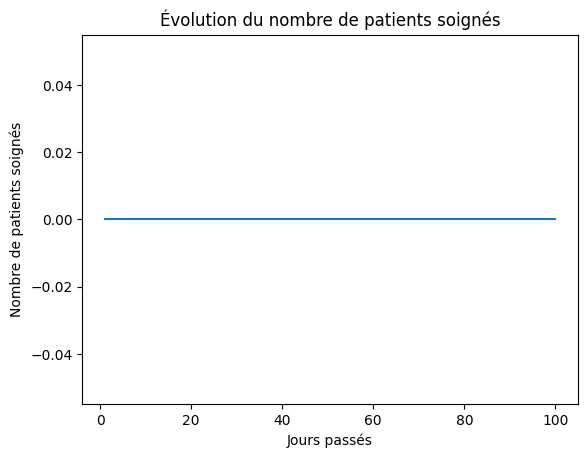

In [22]:
def medoc_strategy():
    # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès et d'échecs pour chaque médicament
    success_rates = [0] * 10
    failure_rates = [0] * 10
    nb_soigne = 0
    jours = []  # Liste pour stocker les jours passés
    nb_soigne_history = []  # Liste pour stocker le nombre de patients soignés

    # Vérification du nombre de médicaments restants pour un type donné
    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    # Phase d'exploration - 20 jours, 1 médicament par jour (aléatoire)
    for jour in range(1, 21):
        medication = random.choice(medoc)
        if count_medicaments(medication) == 0:
            available_medications = [m for m in medoc if count_medicaments(m) > 0]
            medication = random.choice(available_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)  # Ajouter le jour à la liste
        nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste

    # Phase d'exploitation - 80 jours, 1 médicament par jour (aléatoire sur ceux avec success_rate > 0)
    for jour in range(21, 101):
        best_medications = [med+1 for med, success_rate in enumerate(success_rates) if success_rate > 0 and success_rate+failure_rates[med] !=10]
        if len(best_medications) == 0:
            medication = random.choice(medoc)
        else:
            medication = random.choice(best_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)  # Ajouter le jour à la liste
        nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste

    best_medication = strategy_find(success_rates)
    print("Le médicament le plus efficace est :", best_medication)

    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()

medoc_strategy()


In [ ]:
def medoc_strategy():
	# Liste des médicaments
	medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
	# Initialisation du nombre de succès et d'échecs pour chaque médicament
	success_rates = [0] * 10
	failure_rates = [0] * 10
	nb_soigne = 0
	jours = []  # Liste pour stocker les jours passés
	nb_soigne_history = []  # Liste pour stocker le nombre de patients soignés

	# Vérification du nombre de médicaments restants pour un type donné
	def count_medicaments(medication):
		return 10 - (success_rates[medication-1] + failure_rates[medication-1])

	# Phase d'exploration - 30 jours, test de chaque médicament de manière séquentielle
	medic_iter = itertools.cycle(medoc)
	for jour in range(1, 31):
		medication = next(medic_iter)
		if count_medicaments(medication) == 0:
			available_medications = [m for m in medoc if count_medicaments(m) > 0]
			medication = random.choice(available_medications)
		success = proba_medic(medication)
		if success:
			success_rates[medication - 1] += 1
			nb_soigne += 1
		else:
			failure_rates[medication - 1] += 1
		jours.append(jour)  # Ajouter le jour à la liste
		nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste


    # Phase d'exploitation - 70 jours, 1 médicament par jour (aléatoire sur ceux avec success_rate > 0)
    for jour in range(31, 101):
        best_medications = [med+1 for med, success_rate in enumerate(success_rates) if success_rate > 0 and success_rate+failure_rates[med] != 10]
        if len(best_medications) == 0:
            medication = random.choice(medoc)
        else:
            medication = random.choice(best_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)  # Ajouter le jour à la liste
        nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste

    best_medication = strategy_find(success_rates)
    print("Le médicament le plus efficace est :", best_medication)

    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()

medoc_strategy()


Les médicaments à donner sont : [] avec selon les pourcentages [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Les médicaments à donner sont : [] avec selon les pourcentages [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Les médicaments à donner sont : [] avec selon les pourcentages [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


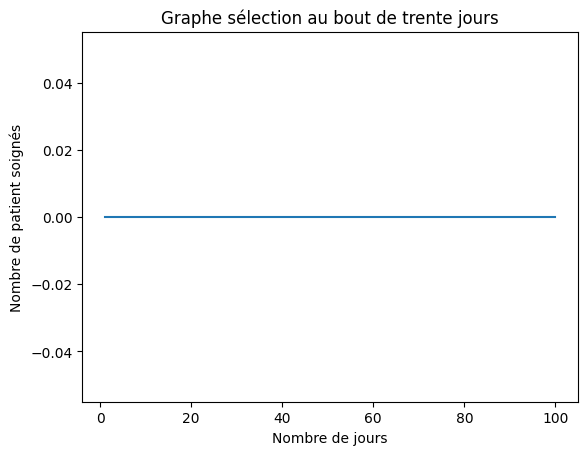

Lse médicaments les plus efficaces sont : []


In [ ]:
def medoc_strategy1():
    # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès pour chaque médicament
    success_rates = [0] * 10
    failure_rates = [0] * 10
    x = []
    nb = 0
    nb_soigne = []
    taux_soigne = 0
    medic_iter = itertools.cycle(medoc)
    # Test sur une période de 100 jours
    for day in range(100):
        nb+=1
        x.append(nb)

        # Vérification du nombre de médicaments restants pour un type donné
        def count_medicaments(medication):
            return 10 - (success_rates[medication-1] + failure_rates[medication-1])
        
        if (nb > 30):
            for i in range(len(success_rates)):  
            max_succes = (max(success_rates) if count_medicaments(medoc[success_rates.index(max_succes)]) == 0 else: )
                medication = medoc[success_rates.index(max_succes)]  
        else:
            # Administration d'un médicament d'un type par jour
            medication = next(medic_iter)

        success = proba_medic(medication)
        if success:
            taux_soigne+=1
            success_rates[medication - 1] += 1
        # Ajout de la valeur du nombre de soigné
        nb_soigne.append(taux_soigne)
    # Recherche des médicaments avec un taux de réussite supérieur à 2
    best_medications = strategy_find1(success_rates)
    print("Les médicaments à donner sont :", best_medications)
    # Mise à jour de la liste des médicaments à tester
    medoc = best_medications
    y = nb_soigne
    plt.plot(x, y)
    plt.ylabel("Nombre de patient soignés")
    plt.xlabel("Nombre de jours")
    plt.title("Graphe sélection au bout de trente jours")
    plt.show()
    best_medication = strategy_find1(success_rates)
    print("Lse médicaments les plus efficaces sont :", best_medication)
medoc_strategy1()

In [ ]:
import random
import matplotlib.pyplot as plt

def medoc_strategy():
    # Liste des médicaments
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # Initialisation du nombre de succès et d'échecs pour chaque médicament
    success_rates = [0] * 10
    failure_rates = [0] * 10
    nb_soigne = 0
    jours = []  # Liste pour stocker les jours passés
    nb_soigne_history = []  # Liste pour stocker le nombre de patients soignés

    # Vérification du nombre de médicaments restants pour un type donné
    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    # Phase d'exploration - 30 jours, test de chaque médicament de manière séquentielle
    medic_iter = itertools.cycle(medoc)
    for jour in range(1, 31):
        if jour <= 20:
            medication = next(medic_iter)
        else:
            best_medications = [med for med, success_rate in enumerate(success_rates) if count_medicaments(med + 1) > 0]
            if len(best_medications) > 0:
                medication = random.choice(best_medications) + 1
            else:
                medication = random.choice(medoc)
        
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)  # Ajouter le jour à la liste
        nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste

    # Phase d'exploitation - 70 jours, sélection aléatoire parmi les médicaments disponibles
    for jour in range(31, 101):
        available_medications = [med for med in medoc if count_medicaments(med) > 0]
        if len(available_medications) > 0:
            medication = random.choice(available_medications)
        else:
            medication = random.choice(medoc)
        
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)  # Ajouter le jour à la liste
        nb_soigne_history.append(nb_soigne)  # Ajouter le nombre de patients soignés au total à la liste

    # Affichage du médicament le plus efficace
    best_medication = strategy_find(success_rates)
    print("Le médicament le plus efficace est :", best_medication)

    # Tracer le graphe de l'évolution du nombre de patients soignés
    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()

medoc_strategy()


Le médicament le plus efficace est : 6


KeyboardInterrupt: 

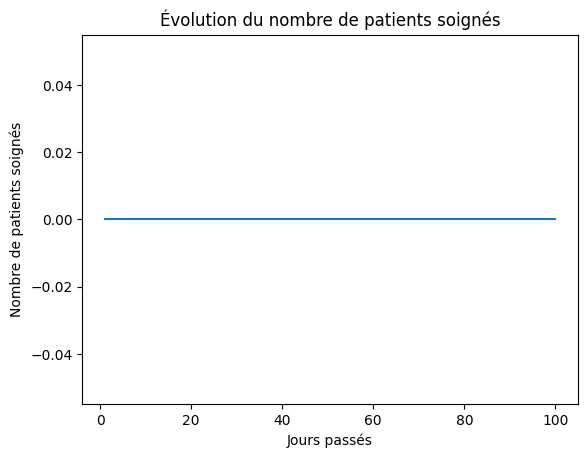

In [ ]:
import random
import matplotlib.pyplot as plt

def medoc_strategy():
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    success_rates = [0] * 10
    failure_rates = [0] * 10
    nb_soigne = 0
    jours = []
    nb_soigne_history = []

    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    # Phase d'exploration - Test de chaque type de médicament
    for medication in medoc:
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(len(jours) + 1)
        nb_soigne_history.append(nb_soigne)

    # Phase d'exploitation - Exploration avec sélection des médicaments les plus prometteurs
    for jour in range(len(jours) + 1, 101):
        best_medications = [med+1 for med, success_rate in enumerate(success_rates) if success_rate > 0 and count_medicaments(med+1) > 0]
        if len(best_medications) == 0:
            medication = random.choice(medoc)
        else:
            medication = random.choice(best_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(len(jours) + 1)
        nb_soigne_history.append(nb_soigne)

    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()

def proba_medic(num_medicament):
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament-1] / 100):
        return False
    else:
        return True

medoc_strategy()


In [ ]:

import random
import matplotlib.pyplot as plt
import numpy as np

def medoc_strategy(num_simulations):
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    success_rates = [0] * 10
    failure_rates = [0] * 10
    jours = []
    nb_soigne_history = []

    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    for _ in range(num_simulations):
        success_rates = [0] * 10
        failure_rates = [0] * 10
        nb_soigne = 0
        for jour in range(1, 101):
            if jour <= 30:
                medication = medoc[jour - 1]
            else:
                best_medications = [med + 1 for med, success_rate in enumerate(success_rates) if
                                    count_medicaments(med + 1) > 0]
                if len(best_medications) == 0:
                    medication = random.choice(medoc)
                else:
                    medication = random.choice(best_medications)
            success = proba_medic(medication)
            if success:
                success_rates[medication - 1] += 1
                nb_soigne += 1
            else:
                failure_rates[medication - 1] += 1
            jours.append(jour)
            nb_soigne_history.append(nb_soigne)

    nb_soigne_history = np.array(nb_soigne_history).reshape(num_simulations, -1)
    mean_nb_soigne = np.mean(nb_soigne_history, axis=0)

    plt.plot(jours, mean_nb_soigne)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre moyen de patients soignés")
    plt.title("Évolution du nombre moyen de patients soignés")
    plt.show()

def proba_medic(num_medicament):
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament-1] / 100):
        return False
    else:
        return True

medoc_strategy(num_simulations=100)


IndexError: list index out of range

ValueError: x and y must have same first dimension, but have shapes (111,) and (110,)

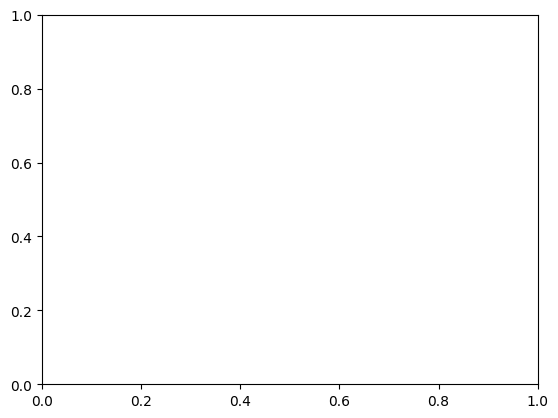

In [ ]:
import random
import matplotlib.pyplot as plt

def medoc_strategy():
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    success_rates = [0] * 10
    failure_rates = [0] * 10
    nb_soigne = 0
    jours = [0]
    nb_soigne_history = []

    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    # Phase d'exploration - Test de chaque type de médicament
    for medication in medoc:
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(len(jours) + 1)
        nb_soigne_history.append(nb_soigne)

    # Phase d'exploitation - Exploration avec sélection des médicaments les plus prometteurs
    for jour in range(100):
        best_medications = [med+1 for med, success_rate in enumerate(success_rates) if success_rate > 0 and count_medicaments(med+1) > 0]
        if len(best_medications) == 0:
            for medication in medoc:
                if count_medicaments(medication) > 0:
                    break
        else:
            medication = random.choice(best_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)
        nb_soigne_history.append(nb_soigne)

    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()

def proba_medic(num_medicament):
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament-1] / 100):
        return False
    else:
        return True

medoc_strategy()


ValueError: x and y must have same first dimension, but have shapes (111,) and (110,)

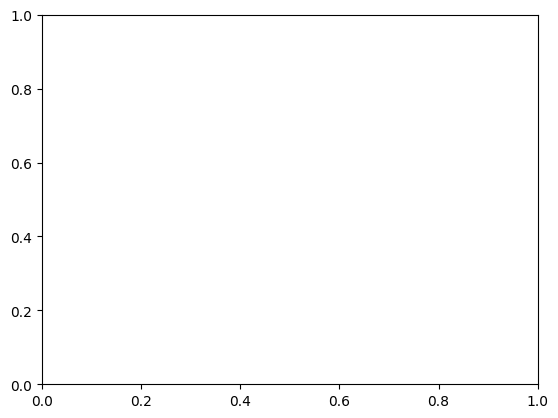

In [ ]:
def proba_medic(num_medicament):
    p = [0.3, 0.85, 0.1, 0.3, 0.5, 0.9, 0.4, 0.75, 0.1, 0.33]
    if random.random() > (p[num_medicament-1] / 100):
        return False
    else:
        return True
   
def medoc_strategy():
    medoc = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    success_rates = [0] * 10
    failure_rates = [0] * 10
    nb_soigne = 0
    jours = [0]
    nb_soigne_history = []

    def count_medicaments(medication):
        return 10 - (success_rates[medication-1] + failure_rates[medication-1])

    # Phase d'exploration - Test de chaque type de médicament
    for medication in medoc:
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(len(jours) + 1)
        nb_soigne_history.append(nb_soigne)

    # Phase d'exploitation - Exploration avec sélection des médicaments les plus prometteurs
    for jour in range(90):
        best_medications = [med+1 for med, success_rate in enumerate(success_rates) if success_rate > 0 and count_medicaments(med+1) > 0]
        if len(best_medications) == 0:
            for medication in medoc:
                if count_medicaments(medication) > 0:
                    break
        else:
            medication = random.choice(best_medications)
        success = proba_medic(medication)
        if success:
            success_rates[medication - 1] += 1
            nb_soigne += 1
        else:
            failure_rates[medication - 1] += 1
        jours.append(jour)
        nb_soigne_history.append(nb_soigne)

    plt.plot(jours, nb_soigne_history)
    plt.xlabel("Jours passés")
    plt.ylabel("Nombre de patients soignés")
    plt.title("Évolution du nombre de patients soignés")
    plt.show()
    


medoc_strategy()

In [ ]:
    def exp_beta(self, listeMedoc):
        success_rate = [0] * 10
        failure_rate = [0] * 10
        jour = 0
        nb_soigne = 0
        taux_soigne = []
        a = 1
        b = 1

        while jour < 100:
            for i in range(len(listeMedoc)):
                medication_choose = random.betavariate(a, b)
                bestMedoc = int(medication_choose * len(listeMedoc))

                monPatient1 = patient()
                result1 = monPatient1.medicamentFonctionne(bestMedoc)
                if result1:
                    success_rate[bestMedoc] += 1
                    nb_soigne += 1
                else:
                    failure_rate[bestMedoc] += 1
                taux_soigne.append(nb_soigne)
                a = 1 + success_rate[bestMedoc]
                b = 1 + failure_rate[bestMedoc]
                jour += 1

        plt.plot(taux_soigne)
        plt.xlabel("Jours passés")
        plt.ylabel("Nombre de patients soignés")
        plt.title("Évolution du nombre de patients soignés")
        plt.show()